In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0,20)
y = -1 * x + 2

In [3]:
def plotting(h,t0,t1,x,y,j,step=10):
    # plot cost
    plt.plot(j)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.show()    
     
    # plot lines per iteration
    plt.scatter(x,y)
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(1,len(j),step):        
        y_hat = t0[i] + t1[i]*x    
        plt.plot(x,y_hat)
    plt.show()
    
    # plot best fit line
    plt.scatter(x,y)
    plt.title('best fit line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,h,c='r')

# AdaGrad

In [4]:
def AdaGrad(in_x, in_y, lr=0.1, episilon=1e-8, max_iter=10000):    
      
    ones = np.ones((in_x.shape[0],1))
    if in_x.ndim == 1:
        in_x = in_x.reshape(-1,1) 
    in_x = np.hstack((ones,in_x))
    in_y = in_y.reshape(-1,1)
    it = 0
    w = np.zeros((in_x.shape[1],1))
    v = 0
    
    h = in_x @ w
    m = in_x.shape[0]
    z = (h - in_y)**2
    cost = 1/(2*m) * z.sum()
    g = (1/m) * (in_x.T @ (h - in_y))
    all_cost = [cost]
    w0s = [w[0]]
    w1s = [w[1]]
    v = v + g**2
    w = w - (lr/(np.sqrt(v)+episilon)) * g
    while it < max_iter and np.linalg.norm(g) > 1e-4:
        w0s.append(w[0])
        w1s.append(w[1])
        it += 1
        h = in_x @ w
        z = (h - in_y)**2
        cost = 1/(2*m) * z.sum()
        g = (1/m) * (in_x.T @ (h - in_y))
        v = v + g**2
        w = w - (lr/(np.sqrt(v)+episilon)) * g
        all_cost.append(cost)
        if cost < 1e-3:
            print('cost',cost)
            break
    print('n_iter',it)
    return w, h, all_cost, w0s,w1s
adagrad_w,adagrad_h,adagrad_costs,adagrad_t0s,adagrad_t1s = AdaGrad(x,y,lr=0.1)

cost 0.0009998771483828402
n_iter 3297


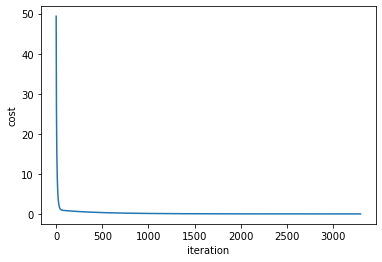

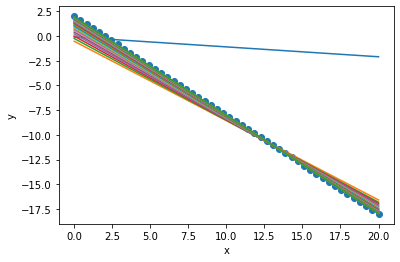

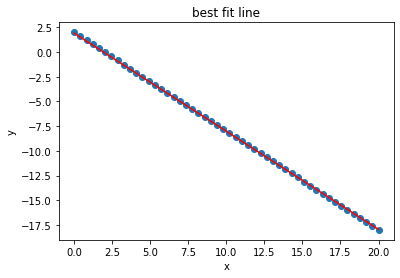

In [5]:
plotting(adagrad_h,adagrad_t0s,adagrad_t1s,x,y,adagrad_costs,100)

# RMSProp

In [6]:
def RMSProp(in_x, in_y, lr=0.1,beta=0.9, episilon=1e-8, max_iter=10000):    
      
    ones = np.ones((in_x.shape[0],1))
    if in_x.ndim == 1:
        in_x = in_x.reshape(-1,1) 
    in_x = np.hstack((ones,in_x))
    in_y = in_y.reshape(-1,1)
    it = 0
    w = np.zeros((in_x.shape[1],1))
    v = 0
    
    h = in_x @ w
    m = in_x.shape[0]
    z = (h - in_y)**2
    cost = 1/(2*m) * z.sum()
    g = (1/m) * (in_x.T @ (h - in_y))
    all_cost = [cost]
    w0s = [w[0]]
    w1s = [w[1]]
    v = beta*v + (1-beta)*g**2
    w = w - (lr/(np.sqrt(v)+episilon)) * g
    while it < max_iter and np.linalg.norm(g) > 1e-3:
#         print(cost)        
        w0s.append(w[0])
        w1s.append(w[1])
        it += 1
        h = in_x @ w
        z = (h - in_y)**2
        cost = 1/(2*m) * z.sum()
        g = (1/m) * (in_x.T @ (h - in_y))
        v = beta*v + (1-beta)*g**2
        w = w - (lr/(np.sqrt(v)+episilon)) * g
        all_cost.append(cost)
        if cost < 1e-3:
            print('cost',cost)
            break
    print('n_iter',it)
    return w, h, all_cost, w0s,w1s
rmsprop_w,rmsprop_h,rmsprop_costs,rmsprop_t0s,rmsprop_t1s = RMSProp(x,y,lr=0.1,beta=0.9)

cost 0.0009494765771988173
n_iter 78


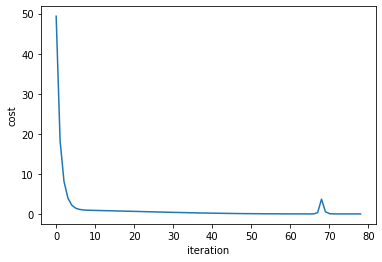

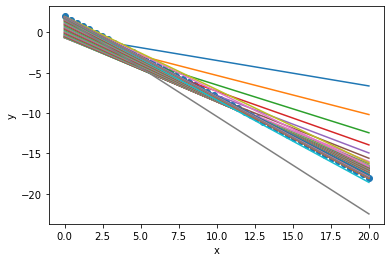

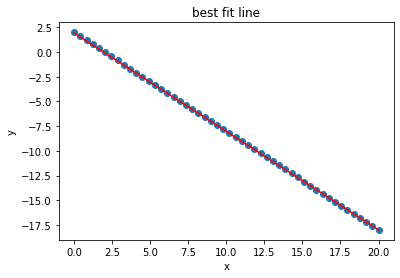

In [7]:
plotting(rmsprop_h,rmsprop_t0s,rmsprop_t1s,x,y,rmsprop_costs,1)

In [8]:
def Adam(in_x, in_y, lr=10,beta1=0.9 ,beta2=0.9 , episilon=1e-8, max_iter=100000):    
      
    ones = np.ones((in_x.shape[0],1))
    if in_x.ndim == 1:
        in_x = in_x.reshape(-1,1) 
    in_x = np.hstack((ones,in_x))
    in_y = in_y.reshape(-1,1)
    it = 0
    weights = np.zeros((in_x.shape[1],1))
    v = 0
    momentum = 0
    
    hypothesis = in_x @ weights
    n = in_x.shape[0]
    z = (hypothesis - in_y)**2
    cost = 1/(2*n) * z.sum()
    g = (1/n) * (in_x.T @ (hypothesis - in_y))
    all_cost = [cost]
    w0s = [weights[0]]
    w1s = [weights[1]]
    momentum = beta1 * momentum + (1-beta1) * g
    v = beta2 * v + (1-beta2) * g**2
    momentum = momentum / (1-beta1**1)
    v = v / (1-beta2**1)
    weights = weights - (lr/(np.sqrt(v)+episilon)) * momentum
    while it < max_iter and np.linalg.norm(g) > 1e-4:
        w0s.append(weights[0])
        w1s.append(weights[1])
        it += 1
        hypothesis = in_x @ weights
        z = (hypothesis - in_y)**2
        cost = 1/(2*n) * z.sum()
        g = (1/n) * (in_x.T @ (hypothesis - in_y))
        momentum = beta1 * momentum + (1-beta1) * g
        v = beta2 * v + (1-beta2) * g**2
        momentum = momentum / (1-beta1**it)
        v = v / (1-beta2**it)
        weights = weights - (lr/(np.sqrt(v)+episilon)) * momentum
        all_cost.append(cost)
        if cost < 1e-4:
            print('cost',cost)
            break
    print('n_iter',it)
    return weights, hypothesis, all_cost, w0s,w1s
adam_w,adam_h,adam_costs,adam_t0s,adam_t1s = Adam(x,y,lr=0.1,beta1=0.9,beta2=0.9)

cost 5.692653199069897e-05
n_iter 3672


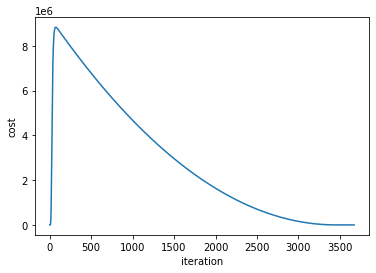

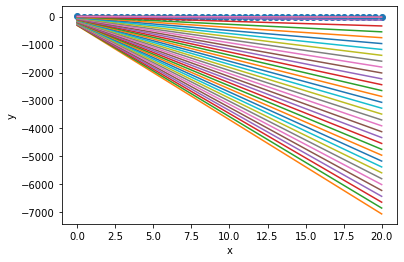

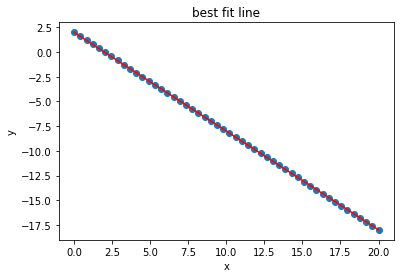

In [9]:
plotting(adam_h,adam_t0s,adam_t1s,x,y,adam_costs,100)